In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from glob import glob
from collections import namedtuple

# F80 #


# Cs-137 spectrum with the organic scintillator #

In [2]:
cs137_organic = np.loadtxt('data/cs137spectrum_organic.dat')

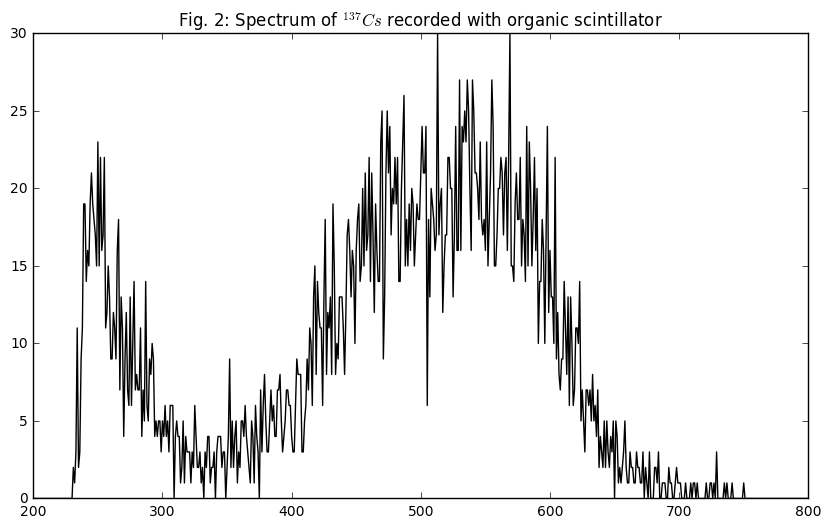

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(cs137_organic, 'k-')
plt.xlim(200, 800)
plt.title('Fig. 2: Spectrum of $^{137}Cs$ recorded with organic scintillator')
plt.savefig('fig02_cs137_organic.jpg', dpi=500)
plt.show()
plt.close()

# TAC spectra #
## Initial spectrum ##

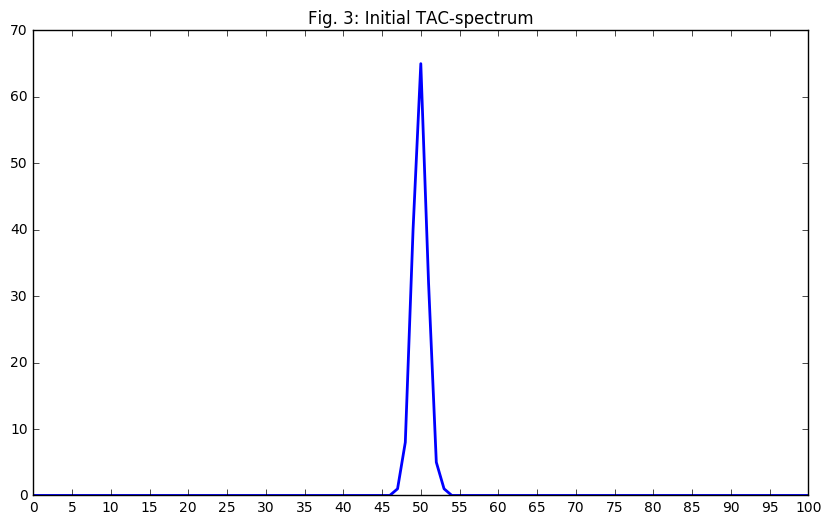

In [4]:
initial = 'data/TACspectrum_60ns_raw.dat'
initial_data = np.loadtxt(initial)
plt.figure(figsize=(10, 6))
plt.xlim(0, 100)
plt.plot(initial_data, lw=2)
plt.title('Fig. 3: Initial TAC-spectrum')
plt.xticks(np.arange(0, 101, 5))
plt.savefig('fig03_tacspectrum_initial.jpg', dpi=500)
plt.show()
plt.close()

## Background spectrum ##

*skipped because there were no counts, noted in labbook*

In [5]:
'''plt.figure(figsize=(10, 6))
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.plot(np.zeros_like(initial_data), lw=2)
plt.title('Fig. 4: Initial TAC-spectrum')
plt.xticks(np.arange(0, 101, 5))
plt.savefig('tacspectrum_background.jpg', dpi=500)
plt.show()
plt.close()'''

"plt.figure(figsize=(10, 6))\nplt.xlim(0, 100)\nplt.ylim(0, 1)\nplt.plot(np.zeros_like(initial_data), lw=2)\nplt.title('Fig. 4: Initial TAC-spectrum')\nplt.xticks(np.arange(0, 101, 5))\nplt.savefig('tacspectrum_background.jpg', dpi=500)\nplt.show()\nplt.close()"

## Different delays in the delay module ##

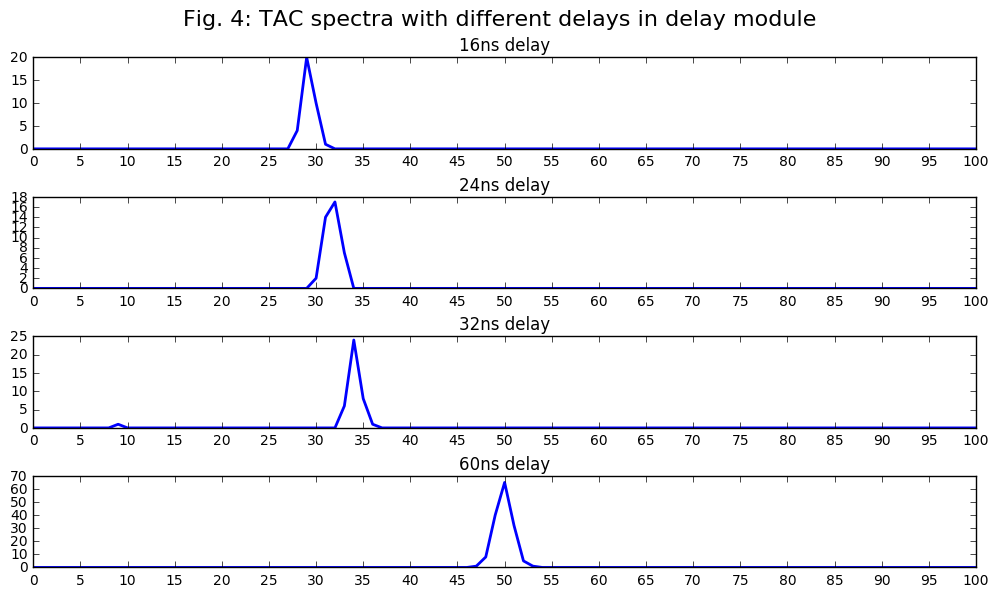

In [6]:
tac = glob('data/tacspectrum*')
plt.figure(figsize=(10, 6))
i=1
for delay in tac:
    plt.subplot(4, 1, i)
    plt.xlim(0, 100)
    with open(delay, 'r') as f:
        line = f.read()
    line = line.replace(',', '.')
    line = line.split()
    data = []
    for l in line:
        data.append(float(l))
    plt.xticks(np.arange(0, 101, 5))
    plt.plot(data, lw=2)
    plt.title(delay[17:19] + 'ns delay')
    i += 1
plt.suptitle('Fig. 4: TAC spectra with different delays in delay module', size=16)
plt.tight_layout(pad=0.75)
plt.subplots_adjust(top=0.9)
plt.savefig('fig04_tacspectrum_differentdelays.jpg', dpi=500)
plt.show()
plt.close()

There might be a linear dependency between the delay and the position of the peak. To be sure, we would need more measurements.

## Different thresholds in the discriminators ##

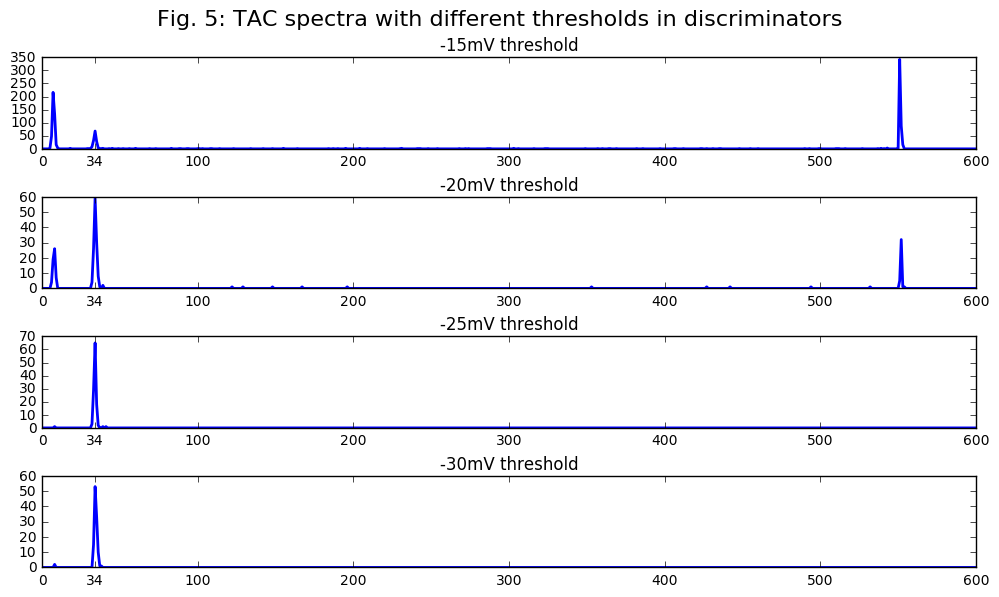

In [7]:
threshold = glob('data/threshold*')
plt.figure(figsize=(10, 6))
i=1
for t in threshold:
    plt.subplot(4, 1, i)
    plt.xlim(0, 600)
    with open(t, 'r') as f:
        line = f.read()
    line = line.replace(',', '.')
    line = line.split()
    data = []
    for l in line:
        data.append(float(l))
    plt.xticks(np.hstack((np.arange(0, 601, 100), 34)))
    plt.plot(data, lw=2)
    plt.title(t[15:18] + 'mV threshold')
    i += 1
plt.suptitle('Fig. 5: TAC spectra with different thresholds in discriminators', size=16)
plt.tight_layout(pad=0.75)
plt.subplots_adjust(top=0.9)
plt.savefig('fig05_tacspectrum_thresholds.jpg', dpi=500)
plt.show()
plt.close()

Higher thresholds eliminate the right peak, which is the highest that we can measure and the left peak, which comes from the voltage passing the trigger threshold twice. The Middle peak is the signal.

## Different working voltages on one scincillator with the other one at -1500V ##

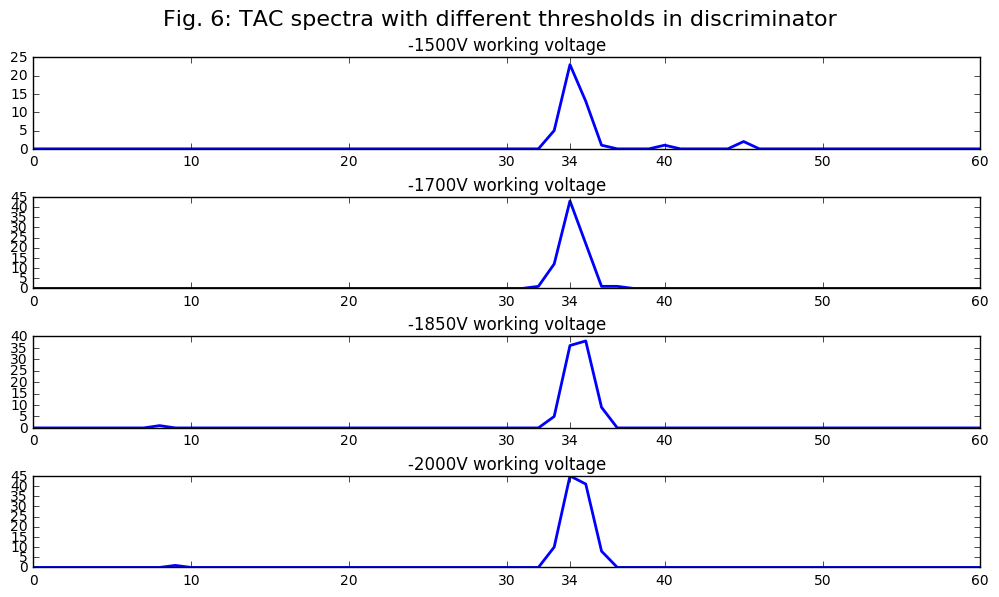

In [8]:
voltage = glob('data/voltage*')
plt.figure(figsize=(10, 6))
i = 1
for volt in voltage:
    plt.subplot(4, 1, i)
    plt.xlim(0, 60)
    with open(volt, 'r') as f:
        line = f.read()
    line = line.replace(',', '.')
    line = line.split()
    data = []
    for l in line:
        data.append(float(l))
    plt.xticks(np.hstack((np.arange(0, 61, 10), 34)))
    plt.plot(data, lw=2)
    plt.title('-{0}V working voltage'.format(volt[12:16]))
    i += 1
plt.suptitle('Fig. 6: TAC spectra with different thresholds in discriminator', size=16)
plt.tight_layout(pad=0.75)
plt.subplots_adjust(top=0.9)
plt.savefig('fig06_tacspectrum_voltage.jpg', dpi=500)
plt.show()
plt.close()

# F80 #
## Time calibration ##

In [9]:
time_calibration = 'data/timecalibration_raw.dat'
plt.figure(figsize=(10, 6))
plt.xlim(0, 200)
with open(time_calibration, 'r') as f:
        line = f.read()
line = line.replace(',', '.')
line = line.split()
data = []
for l in line:
    data.append(float(l))

a = 1.937 +- 0.001, b = 8.125 +- 2.553


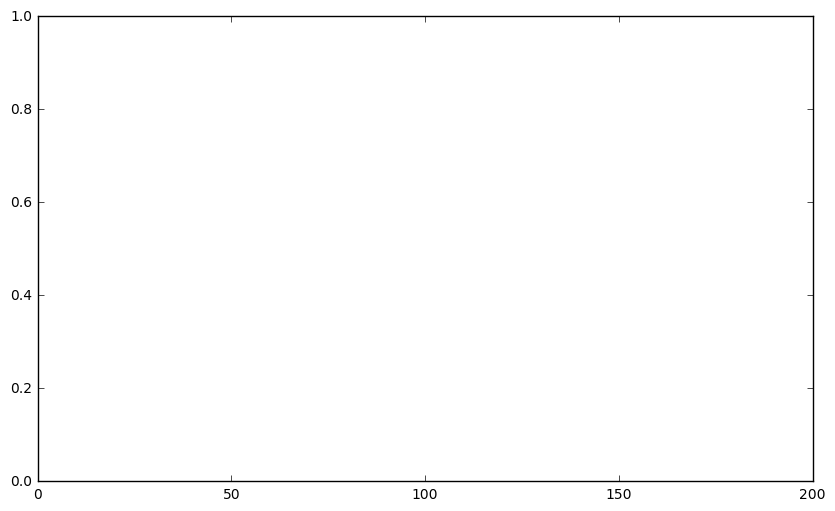

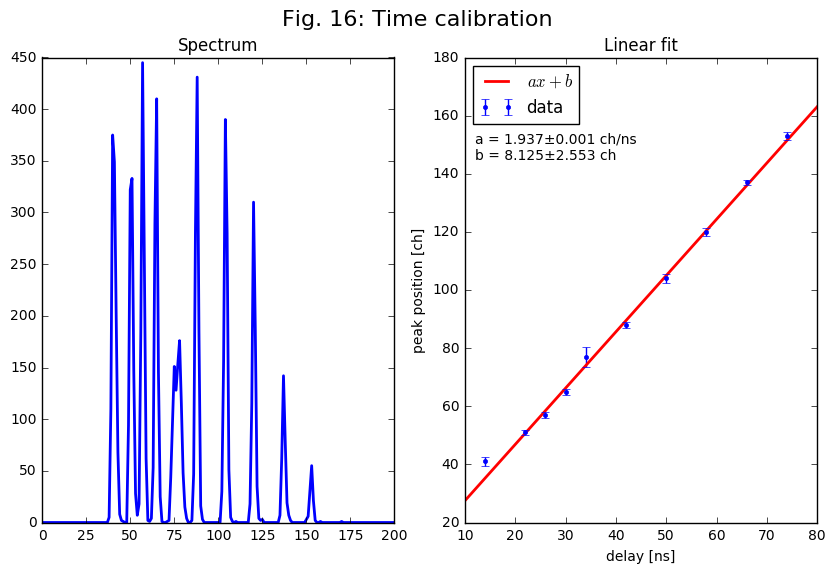

In [10]:
from scipy.optimize import curve_fit

delay = np.array([14, 22, 26, 30, 34, 42, 50, 58, 66, 74])
pos = np.array([41, 51, 57, 65, 77, 88, 104, 120, 137, 153])
pos_err = np.array([1.5, 1, 1, 1, 3.5, 1, 1.5, 1.5, 1, 1.5])

def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, delay, pos, sigma=pos_err)

x = np.linspace(10, 80, 100)

print('a = {0:.3f} +- {1:.3f}, b = {2:.3f} +- {3:.3f}'.format(popt[0], pcov[0][0], popt[1], pcov[1][1]))
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(data, lw=2)
plt.xlim(30, 60)
plt.xticks(np.arange(0, 201, 25))
plt.title('Spectrum')
plt.subplot(122)
plt.plot(x, linear(x, popt[0], popt[1]), 'r-',label='$ax+b$', lw=2)
plt.errorbar(delay, pos, yerr=pos_err, fmt='.', label='data')
plt.legend(loc='upper left')
plt.text(12, 145, 'a = {:.3f}±{:.3f} ch/ns\nb = {:.3f}±{:.3f} ch'.format(popt[0], pcov[0][0],
                                                                        popt[1], pcov[1][1]))
plt.xlim(10, 80)
plt.xlabel('delay [ns]')
plt.ylabel('peak position [ch]')
plt.title('Linear fit')
plt.suptitle('Fig. 16: Time calibration', size=16)
plt.savefig('fig16_time_calibration.jpg', dpi=500)
plt.show()
plt.close()

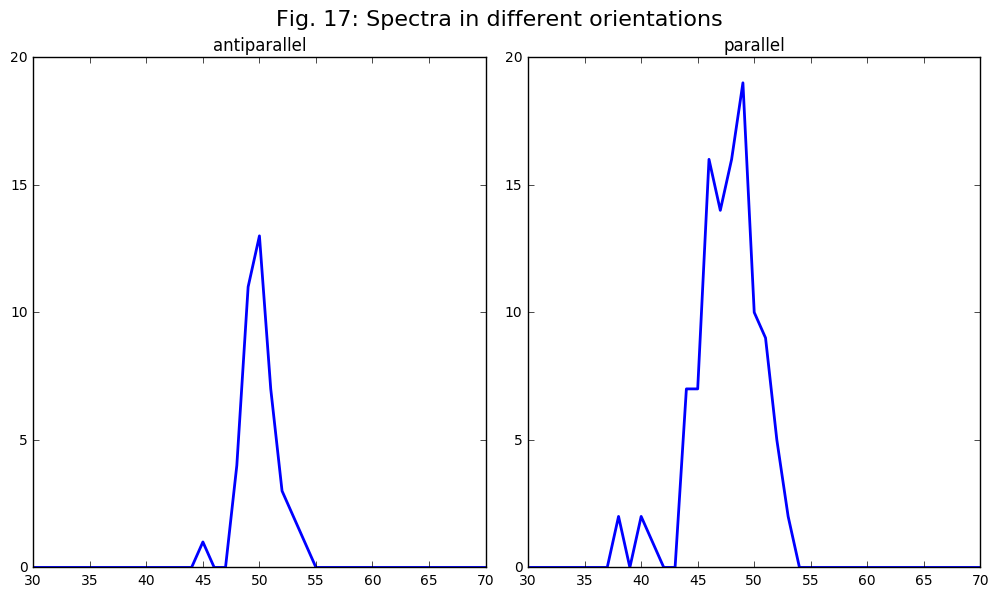

In [11]:
orientations = glob('data/*Parallel*3min*')
voltage = glob('data/voltage*')
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.xlim(30, 70)
plt.ylim(0, 20)
plt.title('antiparallel')
with open(orientations[0], 'r') as f:
    line = f.read()
line = line.replace(',', '.')
line = line.split()
data = []
for l in line:
    data.append(float(l))
plt.plot(data, lw=2)

plt.subplot(122)
plt.ylim(0, 20)
plt.xlim(30, 70)
plt.title('parallel')
with open(orientations[1], 'r') as f:
    line = f.read()
line = line.replace(',', '.')
line = line.split()
data = []
for l in line:
    data.append(float(l))
plt.plot(data, lw=2)

plt.suptitle('Fig. 17: Spectra in different orientations', size=16)
plt.tight_layout(pad=0.75)
plt.subplots_adjust(top=0.9)
plt.savefig('fig17_tacspectrum_voltage.jpg', dpi=500)
plt.show()
plt.close()

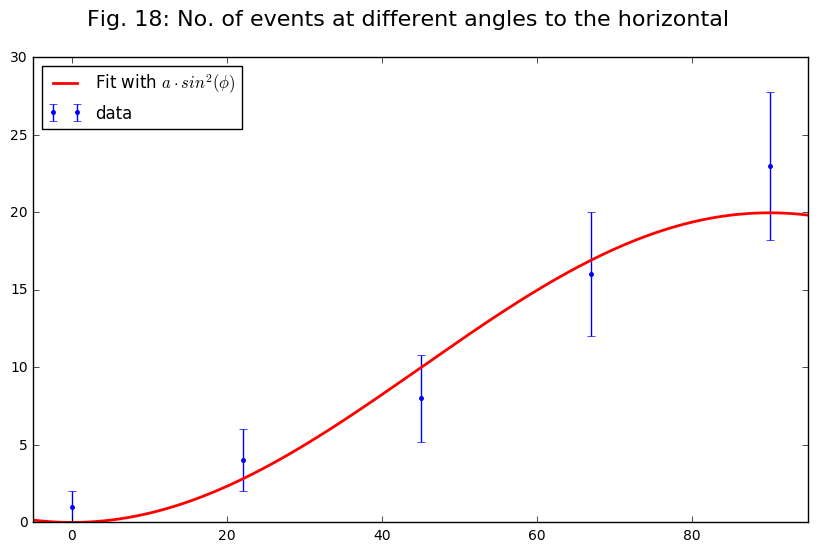

In [12]:
angle = np.array([90, 67, 45, 22, 0])
events = np.array([23, 16, 8, 4, 1])

def sin_sqr(x, a):
    return a * np.sin(2 * np.pi / 360 * x) ** 2

popt_sin, pcov_sin = curve_fit(sin_sqr, angle, events, sigma=np.sqrt(events))

plt.figure(figsize=(10, 6))
plt.errorbar(angle, events, yerr=np.sqrt(events), fmt='.', label='data')
phi = np.linspace(-5, 95, 200)
plt.plot(phi, sin_sqr(phi, popt_sin[0]), 'r-', label='Fit with $a \cdot sin^{2}(\phi)$', lw=2)
plt.xlim(-5, 95)
plt.legend(loc='best')
plt.suptitle('Fig. 18: No. of events at different angles to the horizontal', size=16)
plt.savefig('fig18_sin_sqr_fit.jpg', dpi=500)
plt.show()
plt.close()

# F81 #

In [13]:
def value_from_filename(filename, suffix='', prefix=''):
    features = [int(s[len(prefix):-len(suffix)]) for s in filename.split('_') if s[len(prefix):-len(suffix)].isdigit() and s.endswith(suffix) and s.startswith(prefix)]
    try:
        return features[0]
    except IndexError:
        return None

## Cs-137 spectrum ##

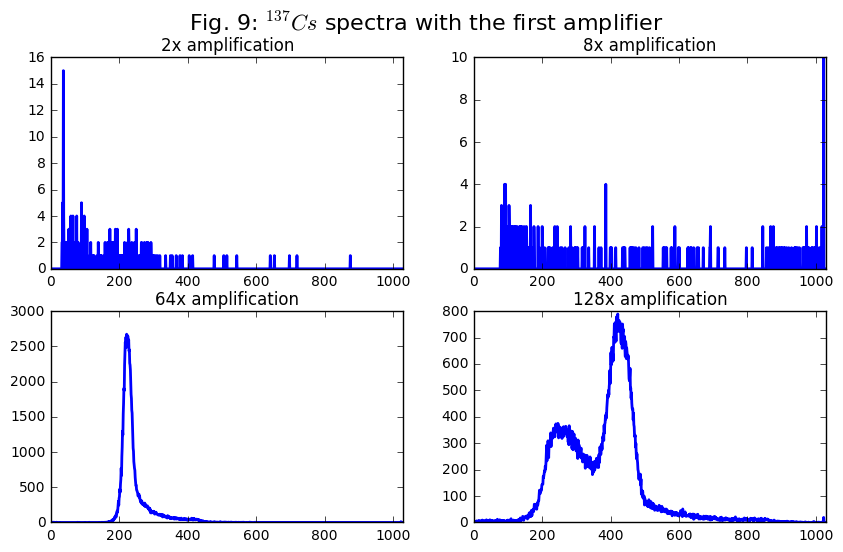

In [14]:
old_amplf = glob('data/cs137_*_ampl*')
old_amplf.sort(key=lambda filename: value_from_filename(filename, 'x', ''))
plt.figure(figsize=(10, 6))
i = 1
for amp in old_amplf:
    plt.subplot(2, 2, i)
    plt.xlim(0, 1030)
    with open(amp, 'r') as f:
        line = f.read()
    line = line.replace(',', '.')
    line = line.split()
    data = []
    for l in line:
        data.append(float(l))
    plt.plot(data, lw=2)
    amplification = value_from_filename(amp, 'x', '')
    plt.title('{0}x amplification'.format(amplification))
    i += 1
plt.suptitle('Fig. 9: $^{137}Cs$ spectra with the first amplifier', size=16)
plt.subplots_adjust(top=0.9)
plt.savefig('fig09_old_amplifier_spectra.jpg', dpi=500)
plt.show()
plt.close()

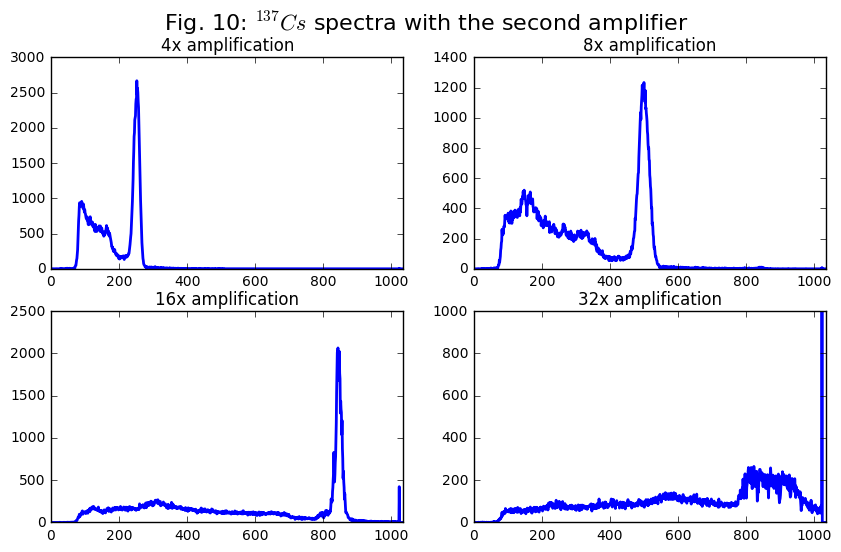

In [15]:
new_amplf = glob('data/new_cs137_*x_ampl*')
new_amplf.sort(key=lambda filename: value_from_filename(filename, 'x', ''))
plt.figure(figsize=(10, 6))
i = 1
for amp in new_amplf:
    plt.subplot(2, 2, i)
    plt.xlim(0, 1035)
    with open(amp, 'r') as f:
        line = f.read()
    line = line.replace(',', '.')
    line = line.split()
    data = []
    for l in line:
        data.append(float(l))
    plt.plot(data, lw=2)
    amplification = value_from_filename(amp, 'x', '')
    if amplification == 32:
        plt.ylim(0, 1000)
    plt.title('{0}x amplification'.format(amplification))
    i += 1
plt.suptitle('Fig. 10: $^{137}Cs$ spectra with the second amplifier', size=16)
plt.subplots_adjust(top=0.9)
plt.savefig('fig10_new_amplifier_spectra.jpg', dpi=500)
plt.show()
plt.close()

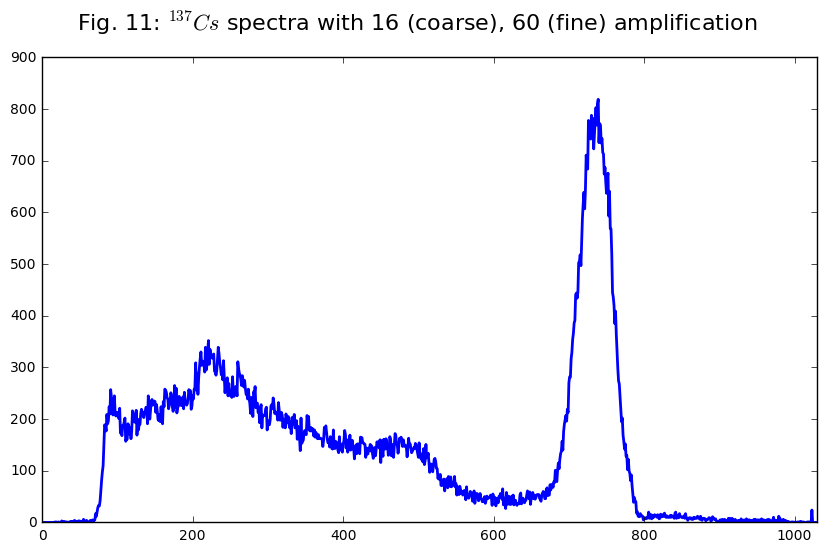

In [16]:
best_spectrum = 'data/new_cs137_16x_60_amplf_8000_raw.dat'
plt.figure(figsize=(10, 6))
plt.xlim(0, 1030)
with open(best_spectrum, 'r') as f:
        line = f.read()
line = line.replace(',', '.')
line = line.split()
data = []
for l in line:
    data.append(float(l))
plt.plot(data, lw=2)
plt.suptitle('Fig. 11: $^{137}Cs$ spectra with 16 (coarse), 60 (fine) amplification', size=16)
plt.savefig('fig11_best_cs137_spectrum.jpg', dpi=500)
plt.show()
plt.close()

## Pulse height as function of voltage ##

['data\\new_cs137_370V_8000_raw.dat', 'data\\new_cs137_380V_8000_raw.dat', 'data\\new_cs137_405V_8000_raw.dat', 'data\\new_cs137_420V_8000_raw.dat', 'data\\new_cs137_435V_8000_raw.dat', 'data\\new_cs137_450V_8000_raw.dat']


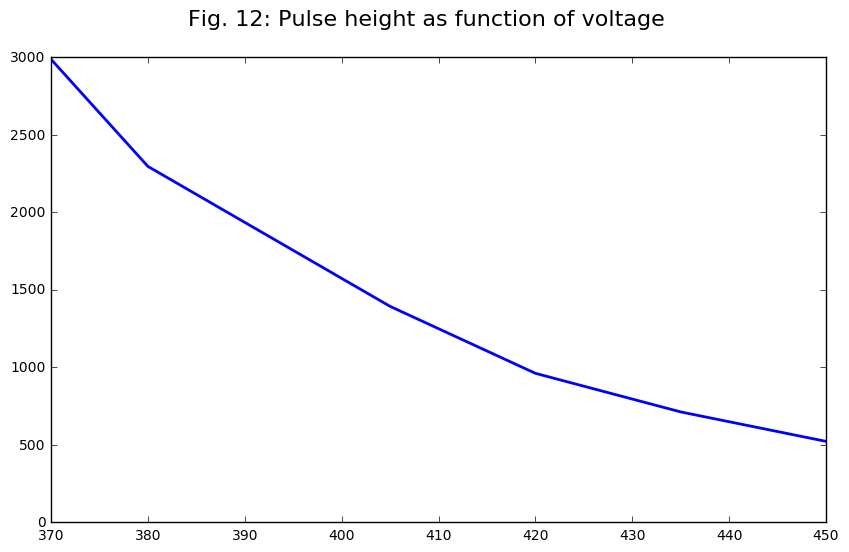

In [17]:
voltages = [f for f in glob('data/*V_*') if not 'HV' in f and 'new_cs137' in f]
print(voltages)
maximums = []
positions = []
volts = []
for v in voltages:
    with open(v, 'r') as f:
        line = f.read()
        line.replace(',', '.')
    line = line.split()
    data = []
    for s in line:
        data.append(float(s))
    data = np.array(data)
    m = np.max(data)
    p = np.argmax(data)
    v = v[15:18]
    volts.append(int(v))
    maximums.append(m)
    positions.append(p)
maximums = np.array(maximums)
positions = np.array(positions)
volts = np.array(volts)
plt.figure(figsize=(10, 6))
plt.plot(np.sort(volts), maximums[np.argsort(volts)], lw=2)
plt.ylim(0, 3000)
plt.suptitle('Fig. 12: Pulse height as function of voltage', size=16)
plt.savefig('fig12_pulse_height_voltage.jpg', dpi=500)
plt.show()
plt.close()

## Energy calibration ##

In [18]:
def gauss(x, A, mu, sig, c):
    return A * np.exp(- 0.5 * ((x - mu) / sig) ** 2) + c

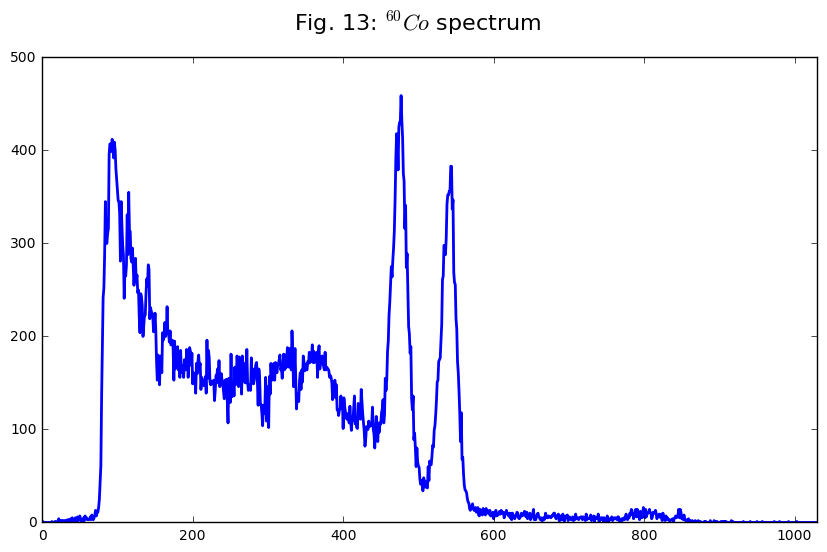

In [19]:
co60 = 'data/co60_spectrum_raw.dat'
plt.figure(figsize=(10, 6))
plt.xlim(0, 1030)
with open(co60, 'r') as f:
        line = f.read()
line = line.replace(',', '.')
line = line.split()
data = []
for l in line:
    data.append(float(l))
data = np.array(data)
co60_max1 = np.argmax(data[400:500]) + 400
co60_max2 = np.argmax(data[500:600]) + 500
popt1, pcov1 = curve_fit(gauss, np.arange(400, 500), data[400:500], p0=(500, co60_max1, 10, 100))
popt2, pcov2 = curve_fit(gauss, np.arange(500, 600), data[500:600], p0=(500, co60_max2, 10, 0))
Peak = namedtuple('Peak', 'mu sigma')
co60_peak1 = Peak(popt1[1], popt1[2])
co60_peak2 = Peak(popt2[1], popt2[2])
x = np.arange(0, 1024)
plt.plot(data, lw=2)
#plt.plot(x, gauss(x, popt1[0], popt1[1], popt1[2], popt1[3]))
#plt.plot(x, gauss(x, popt2[0], popt2[1], popt2[2], popt2[3]))
plt.suptitle('Fig. 13: $^{60}Co$ spectrum', size=16)
plt.savefig('fig13_co60_spectrum.jpg', dpi=500)
plt.show()
plt.close()

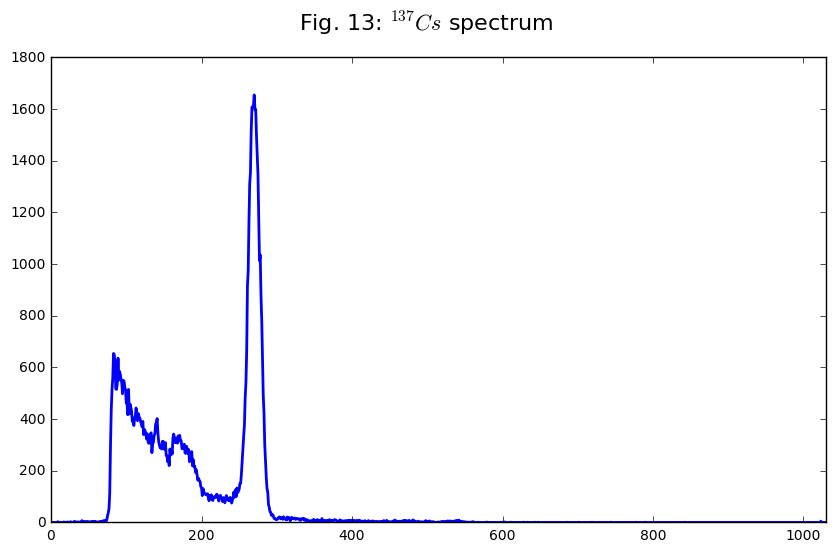

In [20]:
cs137 = 'data/cs137_spectrum_raw.dat'
plt.figure(figsize=(10, 6))
plt.xlim(0, 1030)
with open(cs137, 'r') as f:
        line = f.read()
line = line.replace(',', '.')
line = line.split()
data = []
for l in line:
    data.append(float(l))
data = np.array(data)
cs137_max = np.argmax(data[250:300]) + 250
popt3, pcov3 = curve_fit(gauss, np.arange(200, 300), data[200:300], p0=(1600, cs137_max, 25, 100))
cs137_peak = Peak(popt3[1], popt3[2])
plt.plot(data, lw=2)
#plt.plot(x, gauss(x, popt3[0], popt3[1], popt3[2], popt3[3]))
plt.suptitle('Fig. 13: $^{137}Cs$ spectrum', size=16)
plt.savefig('fig14_cs137_spectrum.jpg', dpi=500)
plt.show()
plt.close()

[ 474.79687305  540.14655816  269.87552818]


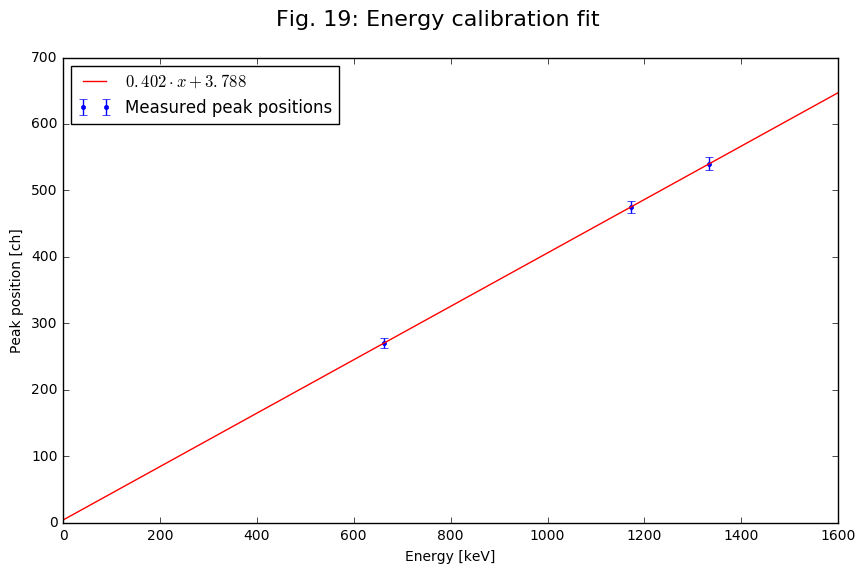

In [21]:
energies = np.array([1.17323, 1.33248, 0.6616]) * 1000 #real energy values of Co60_1, Co60_2, Cs137, Mn54, Na22
peaks = np.array([co60_peak1.mu, co60_peak2.mu, cs137_peak.mu]) # measured channels
print(peaks)
peaks_err = np.array([co60_peak1.sigma, co60_peak2.sigma, cs137_peak.sigma])

def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, energies, peaks, sigma=peaks_err, absolute_sigma=True)

plt.figure(figsize=(10, 6))
plt.errorbar(energies, peaks, yerr=peaks_err, fmt='.', label='Measured peak positions')
x = np.linspace(0, 1600)
plt.plot(x, linear(x, popt[0], popt[1]), 'r-', label='${0:.3f} \cdot x + {1:.3f}$'.format(popt[0], popt[1]))
plt.xlim(0, 1600)
plt.xlabel('Energy [keV]')
plt.ylabel('Peak position [ch]')
plt.legend(loc='best')
plt.suptitle('Fig. 19: Energy calibration fit', size=16)
plt.savefig('fig19_energy_calibration.jpg', dpi=500)
plt.show()
plt.close()

## End point energy ##

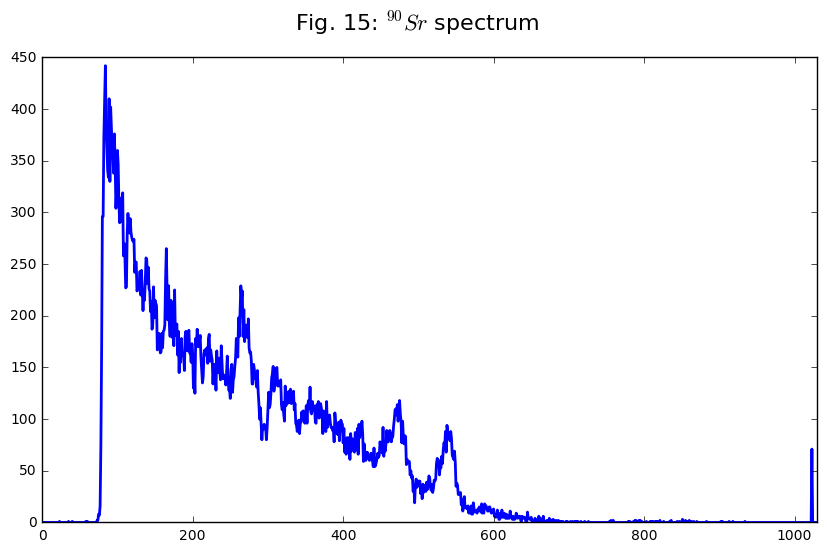

In [22]:
co60 = 'data/sr90_spectrum_6min_raw.dat'
plt.figure(figsize=(10, 6))
plt.xlim(0, 1030)
with open(co60, 'r') as f:
        line = f.read()
line = line.replace(',', '.')
line = line.split()
data = []
for l in line:
    data.append(float(l))
plt.plot(data, lw=2)
plt.suptitle('Fig. 15: $^{90}Sr$ spectrum', size=16)
plt.savefig('fig15_sr90_spectrum.jpg', dpi=500)
plt.show()
plt.close()

In [23]:
sr90_spectra_files = sorted(glob('data/sr90*mm*'))
with open('data/sr90_glass_raw.dat', 'r') as f:
        line = f.read()
line = line.replace(',', '.')
bg = np.array([float(s) for s in line.split()])
sr90_spectra = []
thickness = []
for spectrum in sr90_spectra_files:
    with open(spectrum, 'r') as f:
        line = f.read()
    line = line.replace(',', '.')
    bg_corrected = (np.array([float(s) for s in line.split()]) - bg).clip(min=0)  #cut off negative counts as they are artifacts
    sr90_spectra.append(bg_corrected)
    
    '''
    # convert data back for gnuplot
    with open('data/corrected_spectra/{}'.format(spectrum[6:]), 'w') as f:
        result = ''
        for i, d in enumerate(bg_corrected):
            result += (str(d) + ' ' + str(i+1) + '\n')
        result.replace('.', ',')
        f.write(result)
    '''
    
    mm = value_from_filename(spectrum, suffix='mm')
    thickness.append(mm)
    
'''
plt.figure(figsize=(10, 6))
for spec, t in zip(sr90_spectra, thickness):
    plt.plot(spec, label='{}mm'.format(t))
plt.xlim(0, 1024)
plt.legend()
plt.show()
plt.close()
'''

"\nplt.figure(figsize=(10, 6))\nfor spec, t in zip(sr90_spectra, thickness):\n    plt.plot(spec, label='{}mm'.format(t))\nplt.xlim(0, 1024)\nplt.legend()\nplt.show()\nplt.close()\n"

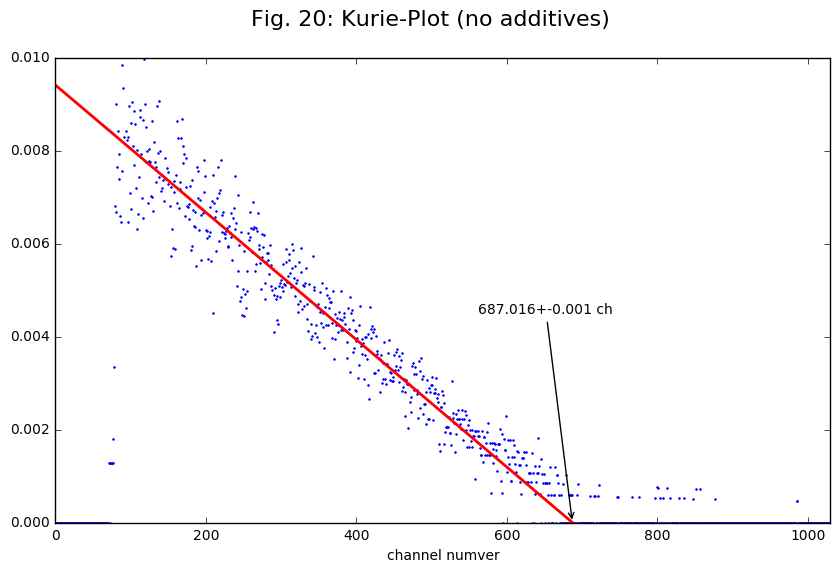

In [24]:
def keV(x):
    return (x - popt[1]) / popt[0]    

def channels(keV):
    return popt[0] * keV + popt[1]

ch = np.arange(1, 4095, 1)  # start at 1 to avoid runtime warnings

m_e = 511 # keV
alpha = 1/137
Z = 38
eta = alpha * Z * (ch + m_e) / np.sqrt(ch ** 2 + 2 * ch * m_e)

def F(ch):
    result = np.zeros_like(ch)
    result = 2 * np.pi * eta / (1 - np.exp(-2 * np.pi * eta))
    return result

def kurie(spec):
    return np.sqrt(spec / (F(ch) * np.sqrt(ch ** 2 + 2 * ch * m_e) * (ch + m_e)))

endpoints = []

for spectrum, filename in zip(sr90_spectra, sr90_spectra_files):
    spectrum = spectrum[1:]  # cut off zero at ch = 0 to match ch array
    A = ch < 400
    B = ch > 100
    keep = A & B
    popt_k, pcov_k = curve_fit(linear, ch[keep], kurie(spectrum)[keep])
    endpoint = - popt_k[1] / popt_k[0]
    endpoint_err = endpoint * np.sqrt((pcov_k[0][0]/popt_k[0])**2+(pcov_k[1][1]/popt_k[1])**2)
    if '00mm' in filename:
        plt.figure(figsize=(10, 6))
        plt.plot(ch, kurie(spectrum), '.', ms=2.5)
        plt.plot(ch, linear(ch, popt_k[0], popt_k[1]), 'r-', lw=2)
        plt.annotate(xy=(endpoint, 0), s='{0:.3f}+-{1:.3f} ch'.format(endpoint, endpoint_err),
                    xytext=(endpoint - 125, 0.0045), arrowprops={'arrowstyle':'->'})
        plt.xlim(0, 1030)
        plt.ylim(0, 0.01)
        plt.suptitle('Fig. 20: Kurie-Plot (no additives)', size=16)
        plt.xlabel('channel numver')
        plt.savefig('fig20_kurie_plot.jpg', dpi=500)
        plt.show()
        plt.close()
    endpoints.append((endpoint, endpoint_err, value_from_filename(filename, suffix='mm')))

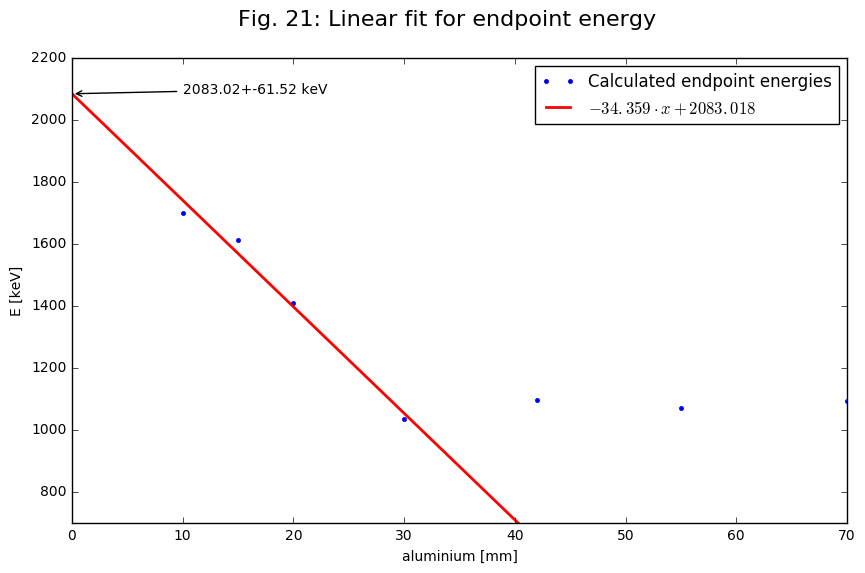

In [25]:
energies_array = np.array(endpoints)

popt_e, pcov_e = curve_fit(linear, (energies_array.T[2] + 10)[:4], keV(energies_array.T[0][:4]))

E0 = linear(np.linspace(0, 70, 100), popt_e[0], popt_e[1])[0]

plt.figure(figsize=(10, 6))
plt.plot(energies_array.T[2] + 10, keV(energies_array.T[0]), '.', label='Calculated endpoint energies')
plt.plot(np.linspace(0, 70, 100), linear(np.linspace(0, 70, 100), popt_e[0], popt_e[1]), 'r', lw=2, label='${0:.3f} \cdot x + {1:.3f}$'.format(popt_e[0], popt_e[1]))
plt.xlim(0, 70)
plt.ylim(700, 2200)
plt.legend(loc='best')
plt.xlabel('aluminium [mm]')
plt.ylabel('E [keV]')
plt.annotate(xy=(0, E0), s='{0:.2f}+-{1:.2f} keV'.format(E0, np.sqrt(pcov_e[1][1])),
            xytext=(10, E0), arrowprops={'arrowstyle':'->'})
plt.suptitle('Fig. 21: Linear fit for endpoint energy', size=16)
plt.savefig('fig21_endpoint_energy.jpg', dpi=500)
plt.show()
plt.close()